# 기본 작업

In [1]:
# 한글 패치
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [48]:
# 라이브러리
library(dplyr) # 정렬
library(NbClust) # k-mean
library(caret)
library(randomForest)
library(nnet)
library(e1071)

In [3]:
# 원본 데이터 불러오기
final<- read.csv("./Data/mycar(priceOK).csv")
head(final)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,246915,volvo,Volvo 850,blue,09/1995,1995,700,106,144,Manual,Petrol,,- (g/km),367462,850 2.5-10V
2,246916,volvo,Volvo 850,blue,06/1995,1995,3590,106,144,Automatic,Petrol,,- (g/km),280000,2.5-10V
3,246917,volvo,Volvo V70,blue,05/1997,1997,1450,132,179,Manual,Petrol,10 l/100 km,237 g/km,286460,2.0 T
4,246918,volvo,Volvo V70,blue,11/1997,1997,650,93,126,Manual,Petrol,10 l/100 km,- (g/km),340000,V70 2.0 - BENZIN / LPG
5,246919,volvo,Volvo V70,blue,09/1997,1997,499,106,144,Manual,Petrol,- (l/100 km),- (g/km),430942,2.5i Klimaautomatik Sitzheizung AHK
6,246920,volvo,Volvo 940,blue,11/1997,1997,2999,99,135,Automatic,Petrol,,- (g/km),317266,Classic Automatik Klima !!!


In [4]:
# 브랜드 종류 파악하기
table(final$brand)


         audi           bmw          ford       hyundai           kia 
        21152         19797         18775          6987          5729 
mercedes-benz        toyota         volvo 
        27205          8195          4163 

In [5]:
# 브랜드가 아우디인 것만 추출
final <- subset(final, brand == 'audi')
table(final$brand)


 audi 
21152 

In [6]:
# 모델 종류 파악하기(수량 내림차순)
sort(table(final$model), decreasing = T )


        Audi A3         Audi A4         Audi A6         Audi A5         Audi A1 
           3567            3394            2879            1730            1351 
        Audi Q3         Audi Q5         Audi TT         Audi Q2         Audi Q7 
           1199            1128             674             604             474 
        Audi A7        Audi SQ5         Audi A8 Audi A6 allroad         Audi S3 
            329             319             296             250             247 
        Audi S5     Audi e-tron Audi A4 allroad        Audi RS3        Audi RS6 
            237             216             210             200             166 
        Audi S6         Audi R8         Audi Q8         Audi S4        Audi TTS 
            146             136             125             120             117 
       Audi SQ7        Audi RS5         Audi A2        Audi RS4      Audi TT RS 
            116             105              93              93              86 
     Audi RS Q3         Aud

In [7]:
# 모델이 Audi A3인 것만 추출
final <- subset(final, model == 'Audi A3')
table(final$model)


Audi A3 
   3567 

In [8]:
# transmission_type Automatic, Manual 추출
final <- subset(final, transmission_type =='Automatic' | transmission_type == 'Manual')
table(final$transmission_type)


Automatic    Manual 
     1506      2048 

In [9]:
# fuel_type Diesel, Petrol 추출
final <- subset(final, fuel_type =='Diesel' | fuel_type == 'Petrol')
table(final$fuel_type)


Diesel Petrol 
  1253   2107 

In [10]:
# 색상 많은 것으로 나열
sort(table(final$color), decreasing = T)


 black silver   grey   blue  white    red yellow  brown        violet  beige 
   866    626    570    506    398    249     73     43      6      5      4 
bronze   gold  green orange 
     4      4      3      3 

In [11]:
# 색상이 150개 이상인 것만 추출 및 수치화
final <- subset(final, color == "black" | color == "silver" | color == "grey" | color == "blue" | color == "white" | color == "red")
sort(table(final$color), decreasing = T)


 black silver   grey   blue  white    red 
   866    626    570    506    398    249 

In [12]:
# 마력 결축치 확인(이상 없음)
sort(table(final$power_kw), decreasing = T)
sort(table(final$power_ps), decreasing = T)



 110   92   85  103   77   81   75  118  132   90  135  140  125  147   74   66 
1093  297  279  246  231  218  176  111  106  105  104   82   50   50   25   17 
 184   96  150  162   82  104  107  115  137  143  155  164  177  228  271 
   8    2    2    2    1    1    1    1    1    1    1    1    1    1    1 


 150  125  116  140  105  110  102  160  179  122  184  190  170  200  101   90 
1093  297  279  246  231  218  176  111  106  105  104   82   50   50   25   17 
 250  131  204  220  111  141  145  156  186  194  211  223  241  310  368 
   8    2    2    2    1    1    1    1    1    1    1    1    1    1    1 

In [13]:
sort(table(final$fuel_consumption_l_100km))


   1 l/100 km  1,7 l/100 km 10,5 l/100 km 10,7 l/100 km 10,8 l/100 km 
            1             1             1             1             1 
 3,2 l/100 km  3,5 l/100 km  3,6 l/100 km  8,5 l/100 km  8,7 l/100 km 
            1             1             1             1             1 
 9,4 l/100 km  1,8 l/100 km   10 l/100 km 10,6 l/100 km  9,3 l/100 km 
            1             2             2             2             2 
 3,3 l/100 km    8 l/100 km  8,3 l/100 km    9 l/100 km  - (l/100 km) 
            3             3             3             3             4 
 8,2 l/100 km  7,9 l/100 km  7,5 l/100 km  7,7 l/100 km  3,7 l/100 km 
            4             5             6             7             8 
 6,2 l/100 km  8,1 l/100 km  7,8 l/100 km  5,4 l/100 km  6,4 l/100 km 
           10            12            15            16            16 
 6,9 l/100 km    7 l/100 km  7,6 l/100 km  6,5 l/100 km  6,3 l/100 km 
           19            21            23            26            27 
 7,4 

In [14]:
# fuel_consumption_l_100km 단위 정제, 결축치 제거
final$fuel_consumption_l_100km <- gsub("l/100 km", "", final$fuel_consumption_l_100km)
final$fuel_consumption_l_100km <- gsub(",", ".", final$fuel_consumption_l_100km)
final$fuel_consumption_l_100km <- ifelse(grepl("-", final$fuel_consumption_l_100km), "", final$fuel_consumption_l_100km)
final <- subset(final, fuel_consumption_l_100km != "")
sort(table(final$fuel_consumption_l_100km))


   1   1.7  10.5  10.7  10.8   3.2   3.5   3.6   8.5   8.7   9.4   1.8    10  
    1     1     1     1     1     1     1     1     1     1     1     2     2 
10.6   9.3   3.3     8   8.3     9   8.2   7.9   7.5   7.7   3.7   6.2   8.1  
    2     2     3     3     3     3     4     5     6     7     8    10    12 
 7.8   5.4   6.4   6.9     7   7.6   6.5   6.3   7.4   7.2   7.1     6   6.7  
   15    16    16    19    21    23    26    27    32    33    39    41    43 
   4   7.3   4.3   6.1   3.9   6.6   4.5   5.9   4.1   6.8   4.6   3.8   5.6  
   45    46    53    59    67    72    80    82    83    83    85    87   106 
 5.8   4.9   5.2   5.7     5   4.2   4.8   5.5   5.3   4.4   5.1   4.7  
  111   113   116   120   133   137   137   141   143   146   179   191 

In [15]:
head(final,1)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
39568,1718,audi,Audi A3,silver,05/1997,1997,850,92,125,Manual,Petrol,8.5,204 g/km,340000,1.8 Attraction (8L)


In [16]:
final <- final[,c(2,3,4,6,7,9,10,11,12,14)]
final$fuel_consumption_l_100km <- as.numeric(final$fuel_consumption_l_100km)
head(final)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
39568,audi,Audi A3,silver,1997,850,125,Manual,Petrol,8.5,340000
39574,audi,Audi A3,silver,1997,2222,101,Manual,Petrol,7.4,167000
39575,audi,Audi A3,silver,1997,700,150,Automatic,Petrol,7.8,180000
39578,audi,Audi A3,blue,1998,999,101,Manual,Petrol,7.4,197000
39585,audi,Audi A3,blue,1999,1699,101,Manual,Petrol,7.4,190000
39589,audi,Audi A3,blue,1999,2200,125,Manual,Petrol,8.3,299000


In [17]:
# 브랜드 번호 : 아우디 -> 2
# 모델 번호 : Audi A3 -> 6
# 변속기 종류 수치화
# 연료 종류 수치화
final$brand <- ifelse(grepl("audi", final$brand), "2", final$brand)
final$brand <- as.numeric(final$brand)
final$model <- ifelse(grepl("Audi A3", final$model), "6", final$model)
final$model <- as.numeric(final$model)
final$transmission_type <- ifelse(grepl("Manual", final$transmission_type), "1", "0")
final$transmission_type <- as.numeric(final$transmission_type)
final$fuel_type <- ifelse(grepl("Petrol", final$fuel_type), "1", "0")
final$fuel_type <- as.numeric(final$fuel_type)
head(final)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
39568,2,6,silver,1997,850,125,1,1,8.5,340000
39574,2,6,silver,1997,2222,101,1,1,7.4,167000
39575,2,6,silver,1997,700,150,0,1,7.8,180000
39578,2,6,blue,1998,999,101,1,1,7.4,197000
39585,2,6,blue,1999,1699,101,1,1,7.4,190000
39589,2,6,blue,1999,2200,125,1,1,8.3,299000


In [18]:
table(final$color)


 black   blue   grey    red silver  white 
   829    482    541    238    585    374 

In [19]:
# 색상별 존재여부 컬럼 추가 및 수치화
# 검은색
final$color_black <- final$color
final$color_black <- ifelse(grepl("black", final$color_black), "1", "0")
final$color_black <- as.numeric(final$color_black)
# 은색
final$color_silver <- final$color
final$color_silver <- ifelse(grepl("silver", final$color_silver), "1", "0")
final$color_silver <- as.numeric(final$color_silver)
# 회색
final$color_grey <- final$color
final$color_grey <- ifelse(grepl("grey", final$color_grey), "1", "0")
final$color_grey <- as.numeric(final$color_grey)
# 파란색
final$color_blue <- final$color
final$color_blue <- ifelse(grepl("blue", final$color_blue), "1", "0")
final$color_blue <- as.numeric(final$color_blue)
# 파란색
final$color_white <- final$color
final$color_white <- ifelse(grepl("white", final$color_white), "1", "0")
final$color_white <- as.numeric(final$color_white)
# 붉은색
final$color_red <- final$color
final$color_red <- ifelse(grepl("red", final$color_red), "1", "0")
final$color_red <- as.numeric(final$color_red)

final1 <- final[,-c(3)]
head(final1)


,brand,model,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_black,color_silver,color_grey,color_blue,color_white,color_red
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39568,2,6,1997,850,125,1,1,8.5,340000,0,1,0,0,0,0
39574,2,6,1997,2222,101,1,1,7.4,167000,0,1,0,0,0,0
39575,2,6,1997,700,150,0,1,7.8,180000,0,1,0,0,0,0
39578,2,6,1998,999,101,1,1,7.4,197000,0,0,0,1,0,0
39585,2,6,1999,1699,101,1,1,7.4,190000,0,0,0,1,0,0
39589,2,6,1999,2200,125,1,1,8.3,299000,0,0,0,1,0,0


In [20]:
final <- final1
head(final)

,brand,model,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_black,color_silver,color_grey,color_blue,color_white,color_red
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39568,2,6,1997,850,125,1,1,8.5,340000,0,1,0,0,0,0
39574,2,6,1997,2222,101,1,1,7.4,167000,0,1,0,0,0,0
39575,2,6,1997,700,150,0,1,7.8,180000,0,1,0,0,0,0
39578,2,6,1998,999,101,1,1,7.4,197000,0,0,0,1,0,0
39585,2,6,1999,1699,101,1,1,7.4,190000,0,0,0,1,0,0
39589,2,6,1999,2200,125,1,1,8.3,299000,0,0,0,1,0,0


In [21]:
# 내보내기
# write.csv(final, "./Data/Audi_A3.csv", row.names=F)

## 특이치, 이상치 확인
- 이상치 제거 작업(연도, 가격, 마력, 연비, 주행거리)

### 구분 힘든 경우 쓴 IQR 기법
- IQR = Q3−Q1(3사분위수 - 1사분위수)  
- 알고싶은 데이터 = 알고 싶은 데이터 1단계 작은 데이터 + IQR(높은 값 이상치 확인하고 싶은 경우)
- 알고싶은 데이터 = 알고 싶은 데이터 1단계 높은 데이터 + IQR(낮은 값 이상치 확인하고 싶은 경우)

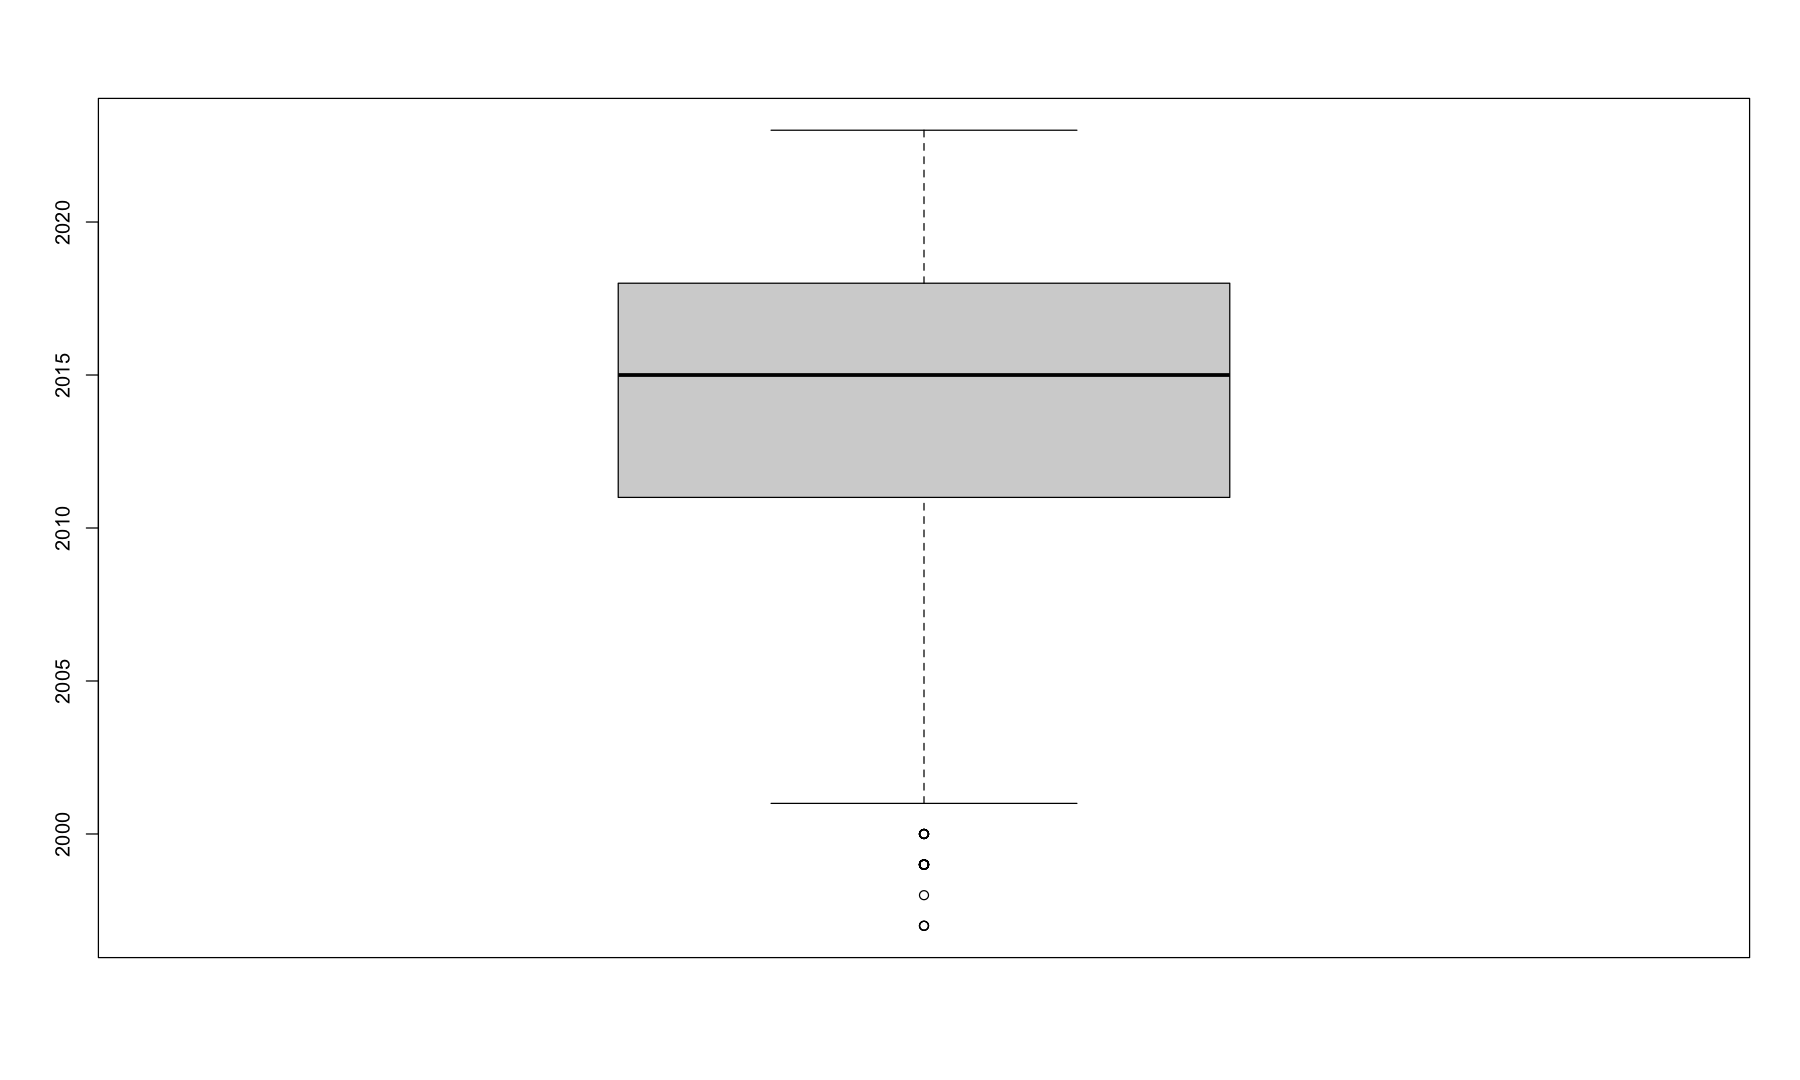

In [22]:
# 연도 이상치 특이치 확인 1차 - 이상없음
par(bg = "white")
boxplot(final$year)

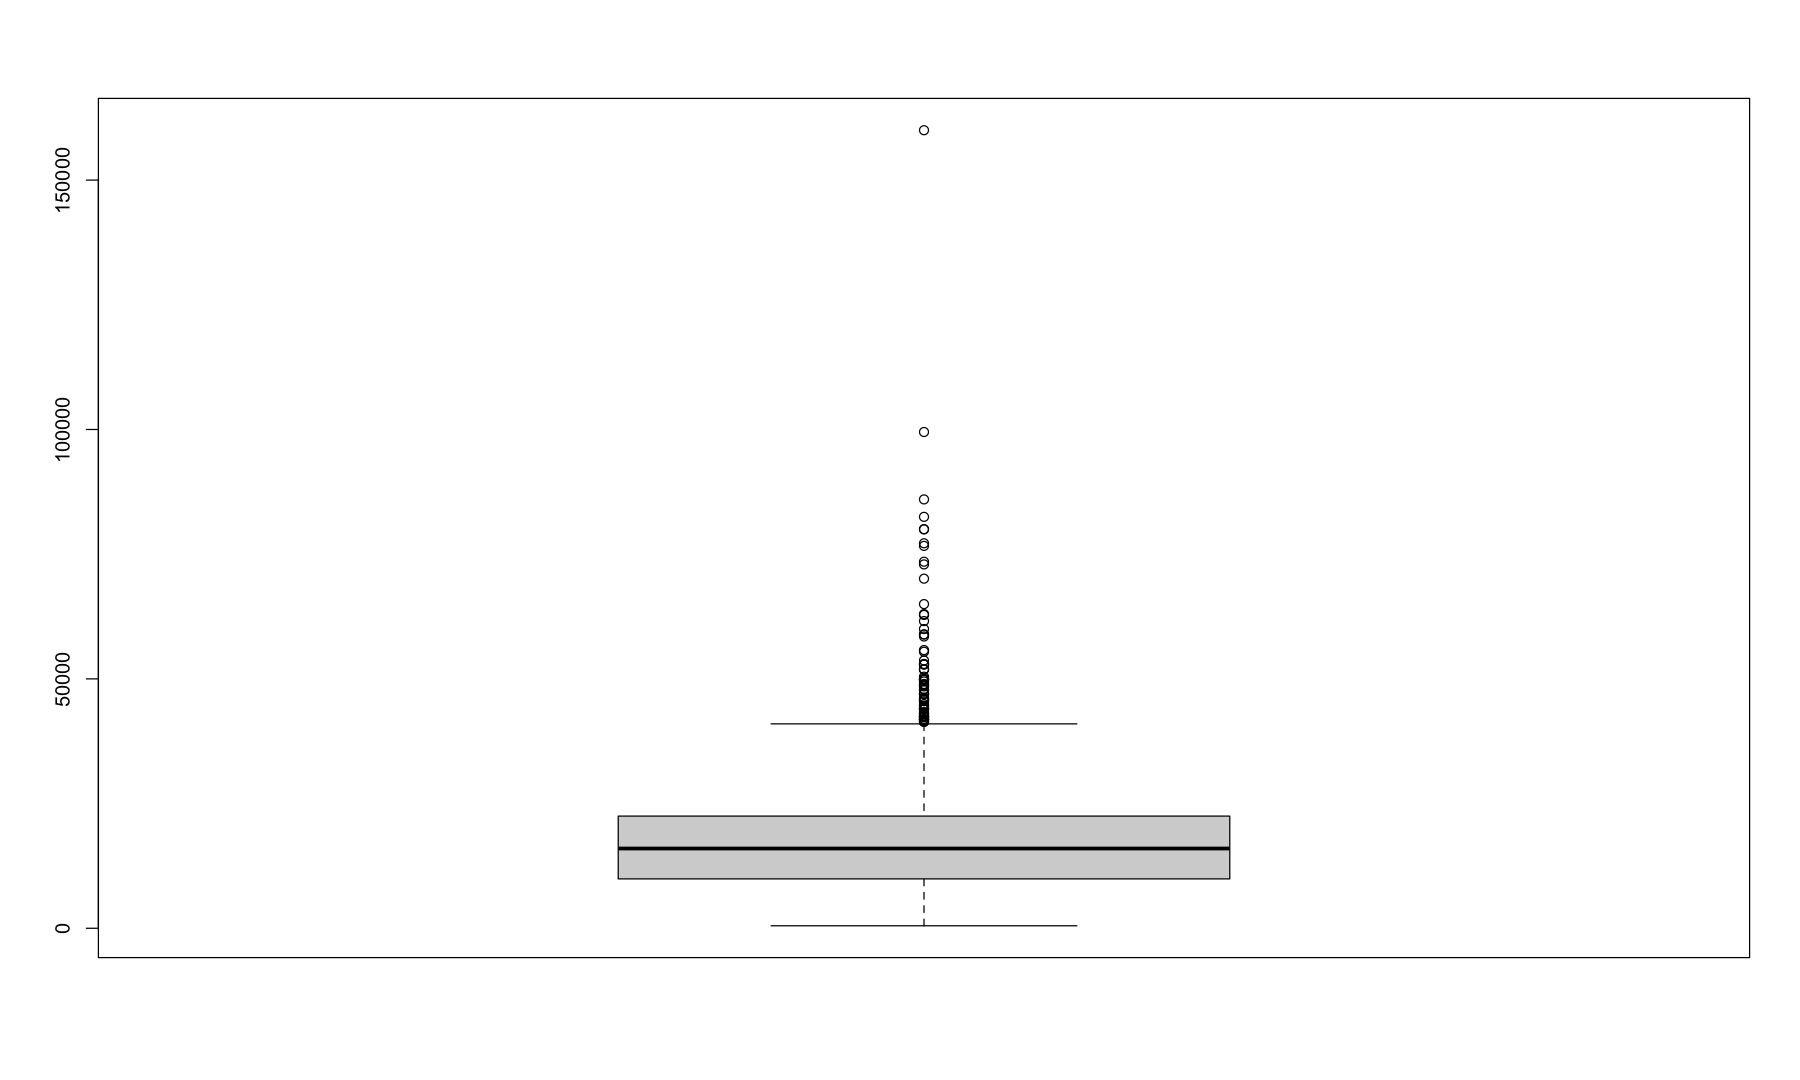

In [23]:
# 가격 이상치 특이치 확인 1차 - (1개 발견)
par(bg = "white")
boxplot(final$price_in_euro)

In [24]:
# 가격 내림차순 정렬 -> 1행 이상치 발견 -> 제거
final <- arrange(final, desc(price_in_euro))[-1, ]
head(final)

,brand,model,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_black,color_silver,color_grey,color_blue,color_white,color_red
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,6,2022,99495,150,0,0,4.7,27049,0,0,0,1,0,0
3,2,6,2018,85980,150,1,1,5.1,86670,0,0,0,1,0,0
4,2,6,2023,82487,110,0,1,4.5,2,0,0,0,1,0,0
5,2,6,2022,79990,150,0,0,3.9,8828,0,0,0,0,0,1
6,2,6,2022,79990,150,0,0,4.6,9948,0,1,0,0,0,0
7,2,6,2022,77180,190,0,1,6.8,4230,0,0,0,1,0,0


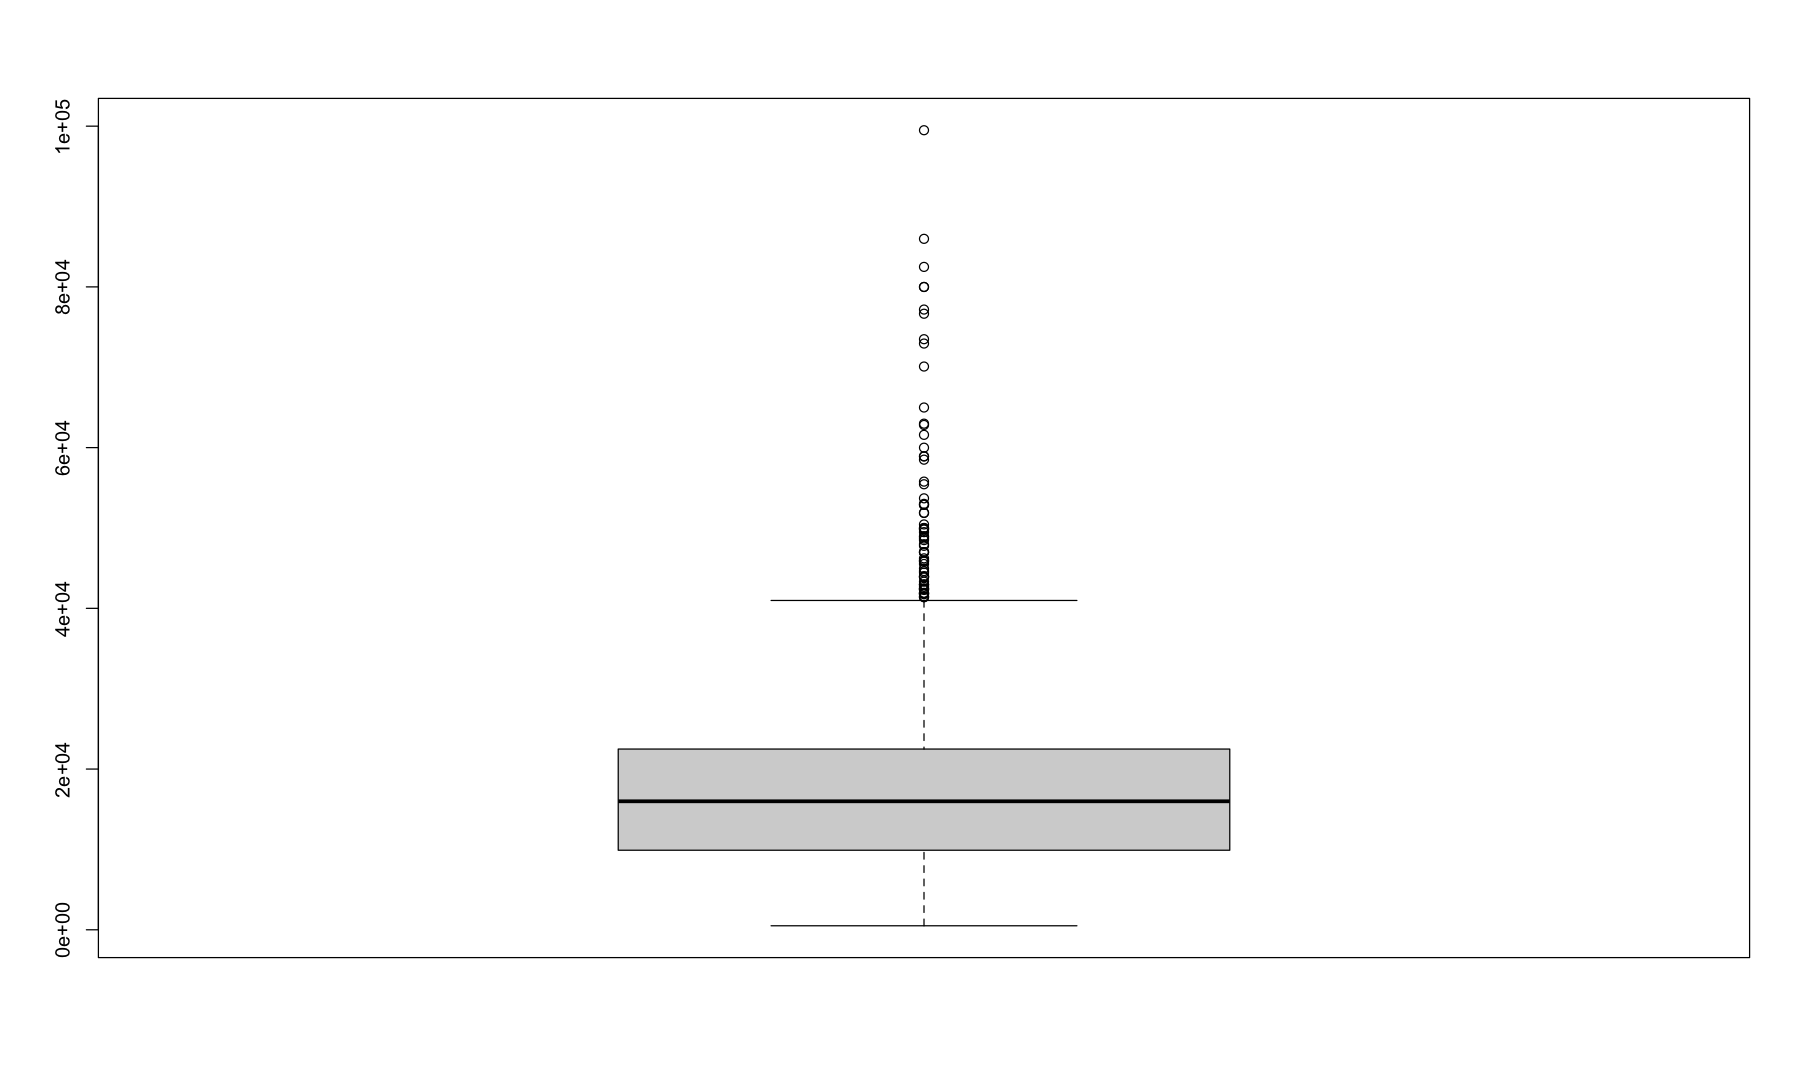

In [25]:
# 가격 이상치 특이치 확인 2차 - (1개 의심)
par(bg = "white")
boxplot(final$price_in_euro)

In [26]:
# 가격 내림차순 정렬 -> 1행 이상치 발견 -> 제거
final <- arrange(final, desc(price_in_euro))[-1, ]
head(final)

,brand,model,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_black,color_silver,color_grey,color_blue,color_white,color_red
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,6,2018,85980,150,1,1,5.1,86670,0,0,0,1,0,0
3,2,6,2023,82487,110,0,1,4.5,2,0,0,0,1,0,0
4,2,6,2022,79990,150,0,0,3.9,8828,0,0,0,0,0,1
5,2,6,2022,79990,150,0,0,4.6,9948,0,1,0,0,0,0
6,2,6,2022,77180,190,0,1,6.8,4230,0,0,0,1,0,0
7,2,6,2022,76660,190,0,1,7.1,9500,0,0,0,0,0,1


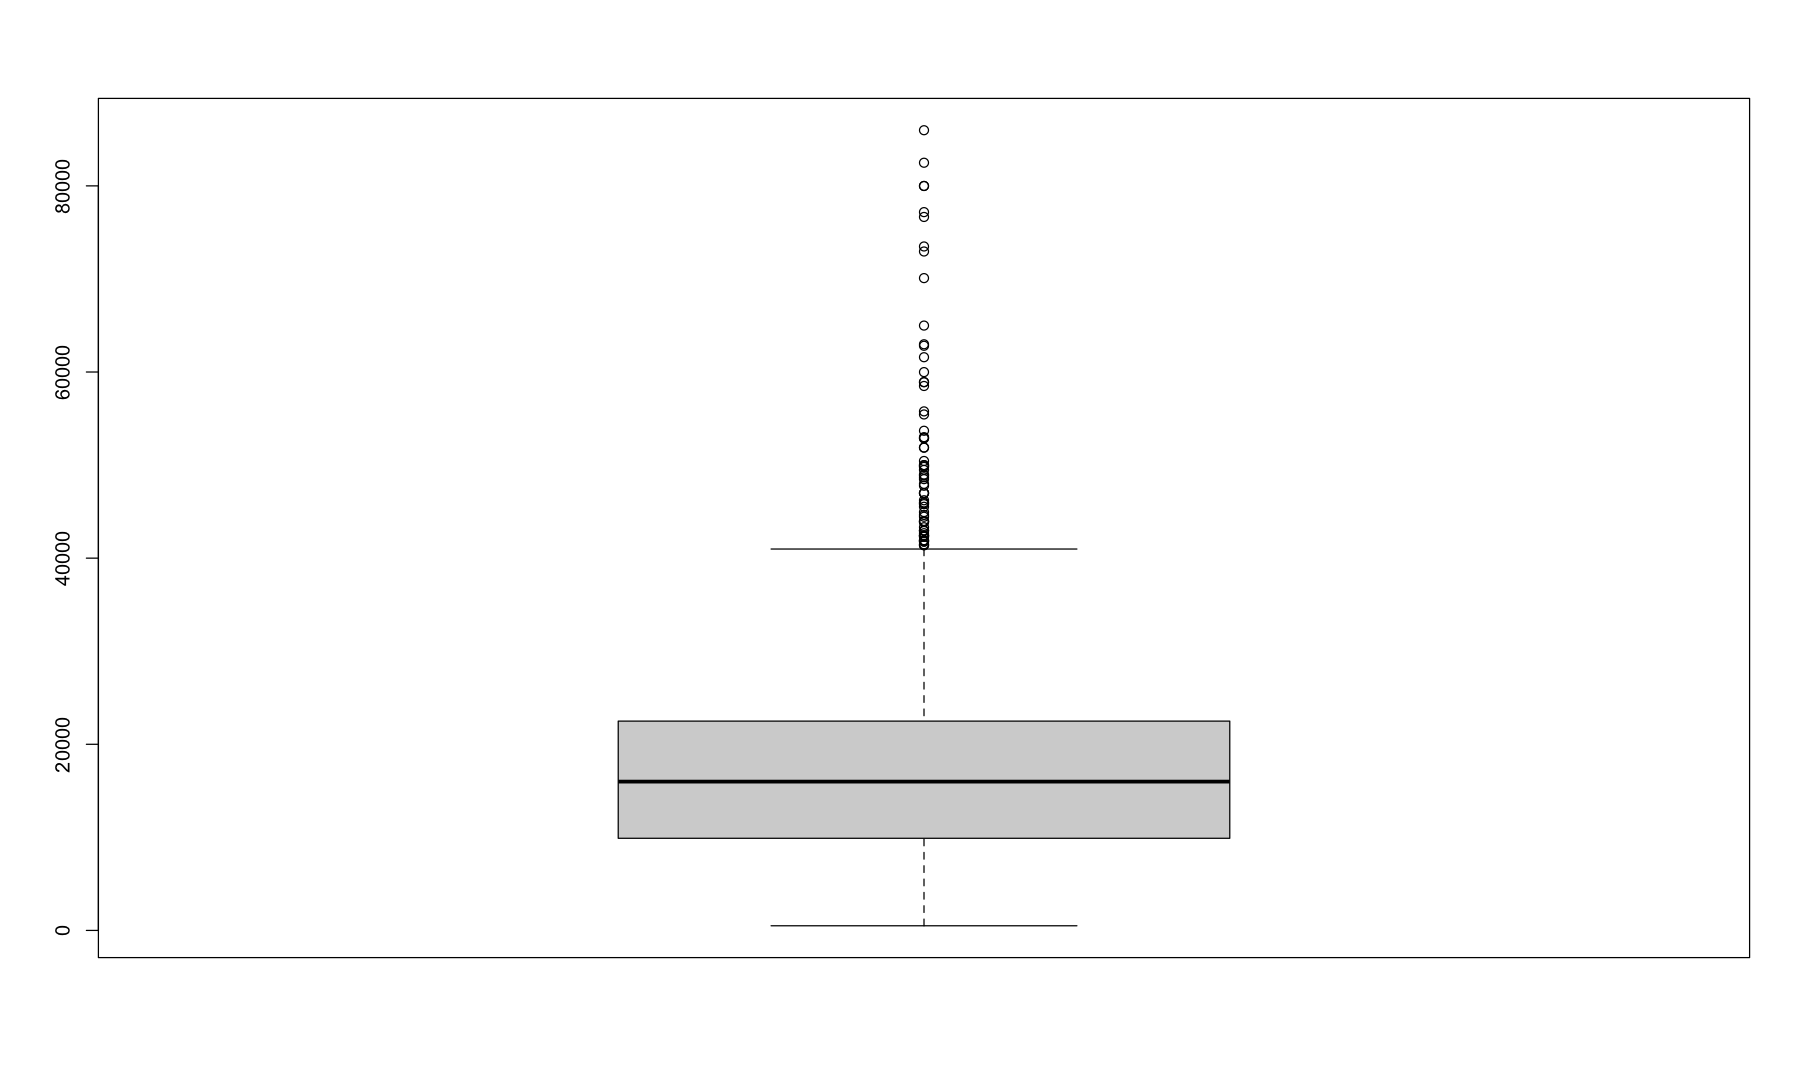

In [27]:
# 가격 이상치 특이치 확인 3차 - (이상없음)
par(bg = "white")
boxplot(final$price_in_euro)

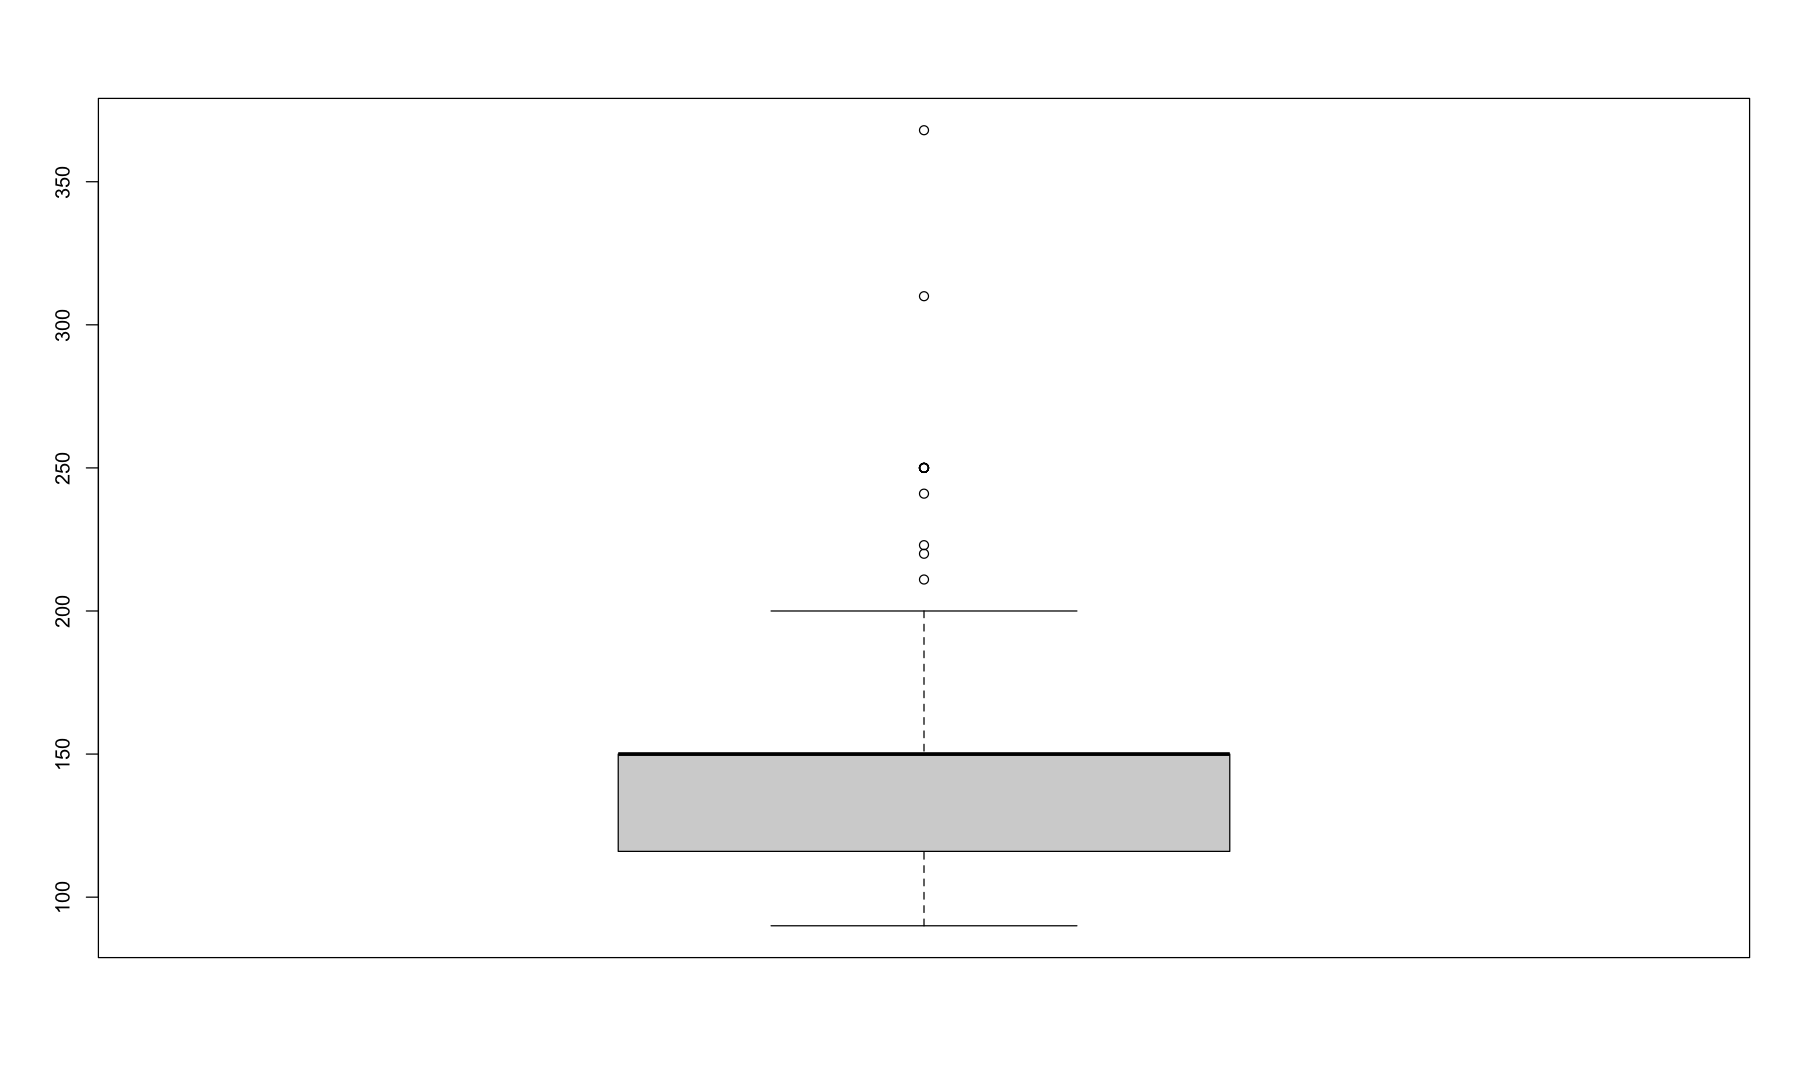

In [28]:
# 마력 이상치 특이치 확인 1차 - (2개 발견)
par(bg = "white")
boxplot(final$power_ps)

In [29]:
# 마력 내림차순 정렬 -> 2행 이상치 발견 -> 제거
final <- arrange(final, desc(power_ps))[-c(1,2), ]
head(final)

,brand,model,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_black,color_silver,color_grey,color_blue,color_white,color_red
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,6,2005,14999,250,1,1,10.6,105000,1,0,0,0,0,0
4,2,6,2007,12999,250,0,1,10.0,146000,1,0,0,0,0,0
5,2,6,2005,11990,250,1,1,10.7,200000,0,1,0,0,0,0
6,2,6,2005,9999,250,0,1,9.4,279000,0,1,0,0,0,0
7,2,6,2004,5500,250,0,1,10.0,216380,1,0,0,0,0,0
8,2,6,2004,5399,250,1,1,10.6,257182,1,0,0,0,0,0


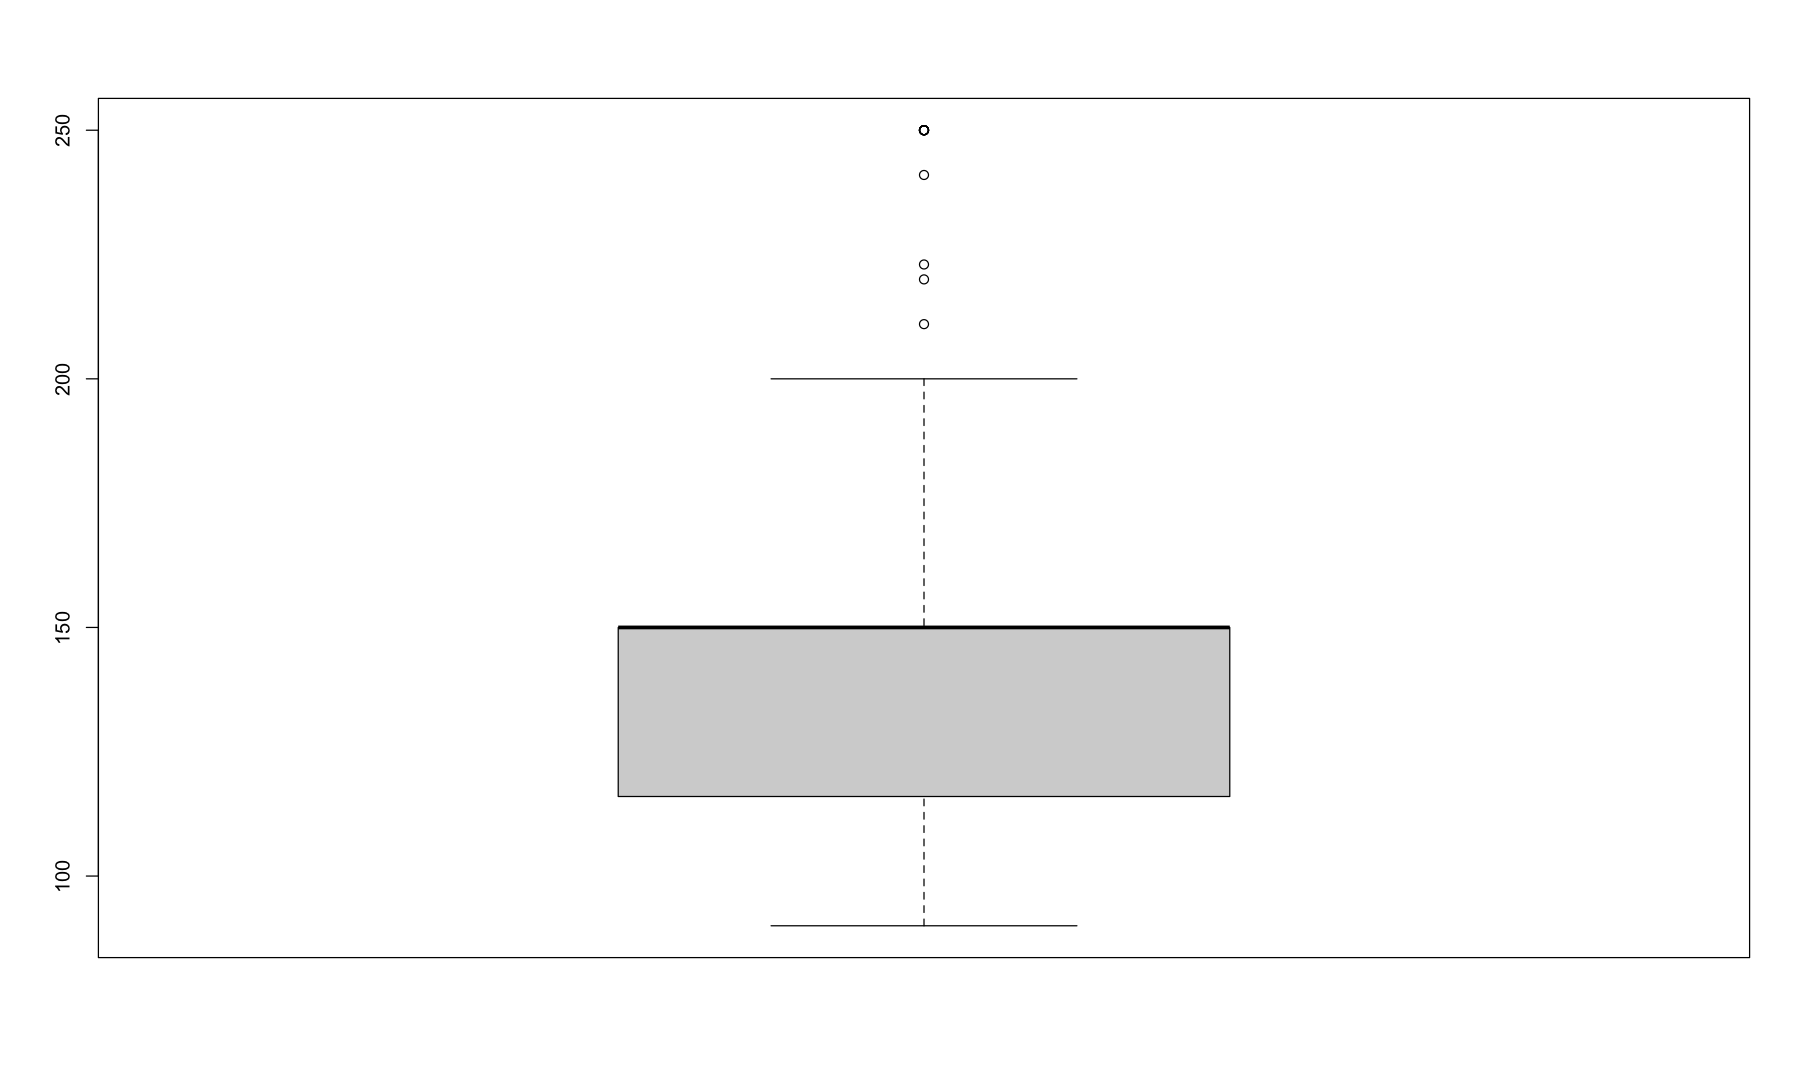

In [30]:
# 마력 이상치 특이치 확인 2차 - (이상없음)
par(bg = "white")
boxplot(final$power_ps)

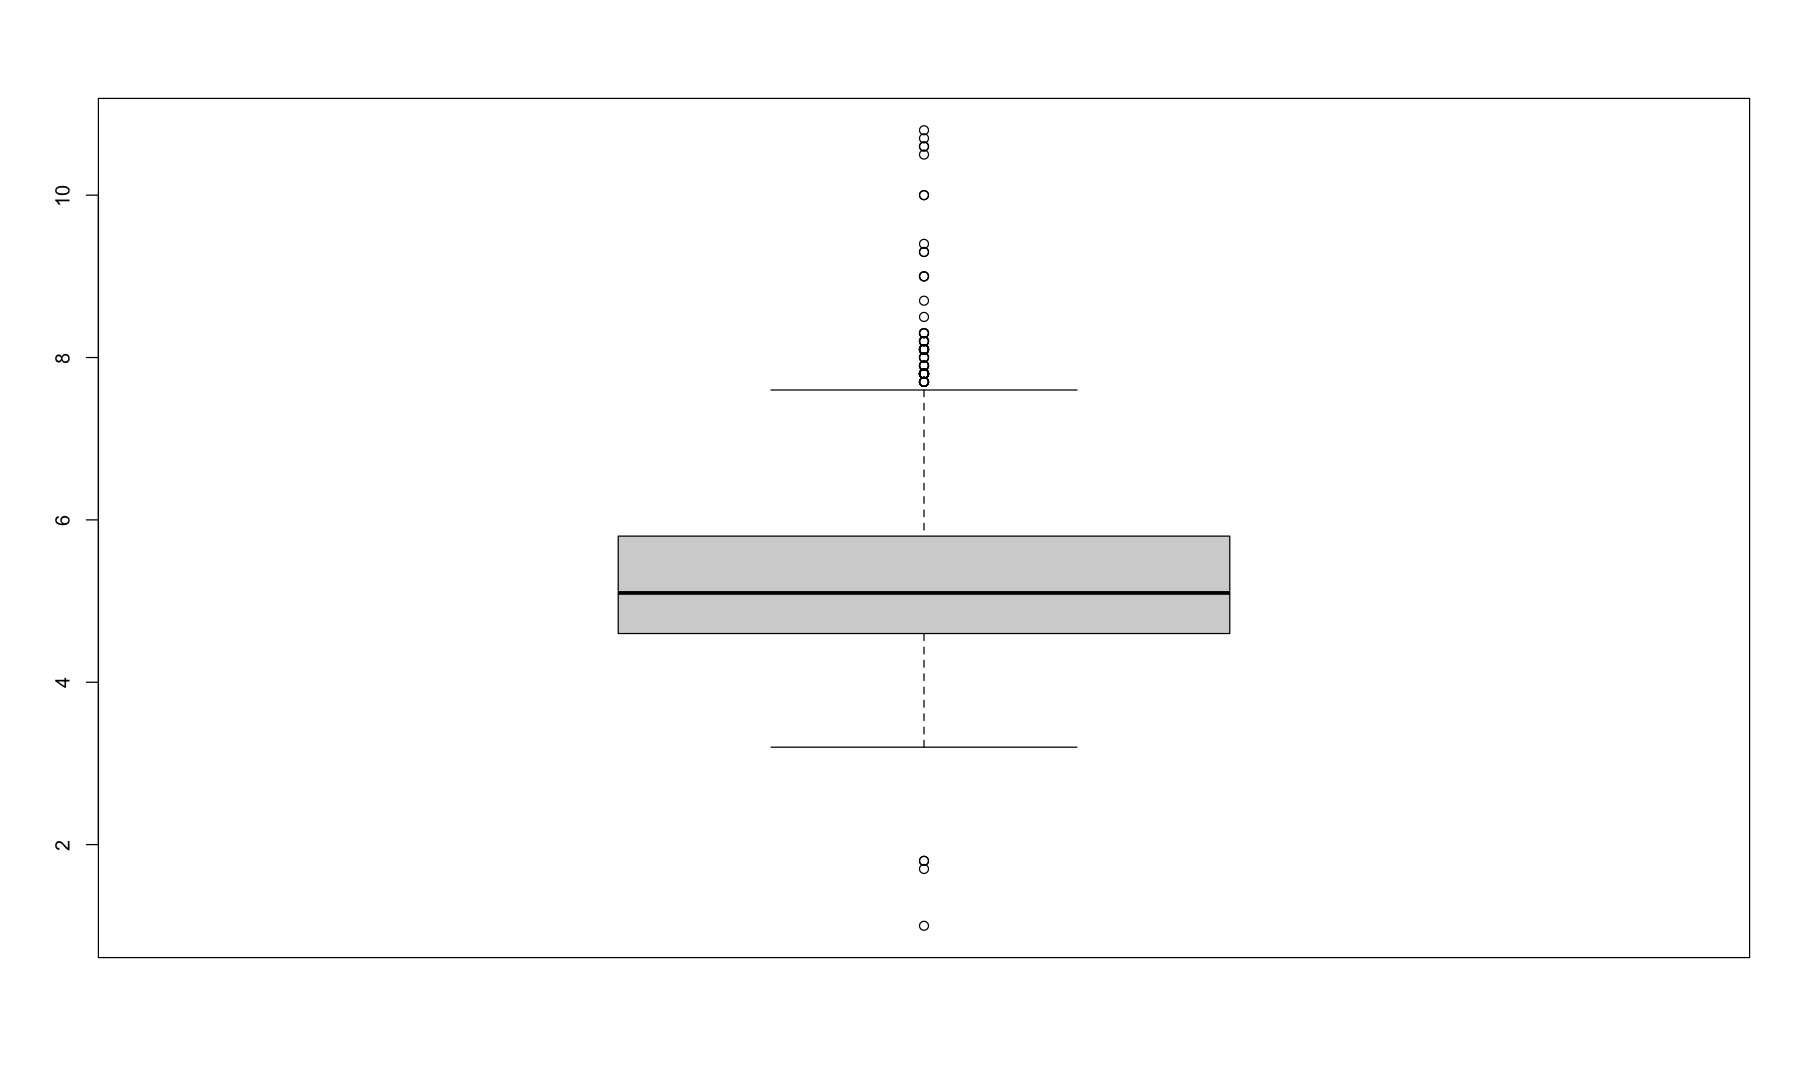

In [31]:
# 연비 이상치 특이치 확인 1차 - (4개 발견)
par(bg = "white")
boxplot(final$fuel_consumption_l_100km)

In [32]:
# 연비 오름차순 정렬 -> 4행 이상치 발견 -> 제거
final <- arrange(final, fuel_consumption_l_100km)[-c(1:4),]
head(final)

,brand,model,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_black,color_silver,color_grey,color_blue,color_white,color_red
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2,6,2016,14950,110,1,0,3.2,103828,0,0,0,1,0,0
6,2,6,2014,13800,110,1,0,3.3,124150,1,0,0,0,0,0
7,2,6,2014,13490,110,1,0,3.3,112400,1,0,0,0,0,0
8,2,6,2014,12990,110,1,0,3.3,150000,0,0,1,0,0,0
9,2,6,2020,24810,116,1,0,3.5,33159,0,1,0,0,0,0
10,2,6,2016,16950,110,1,1,3.6,82880,0,0,1,0,0,0


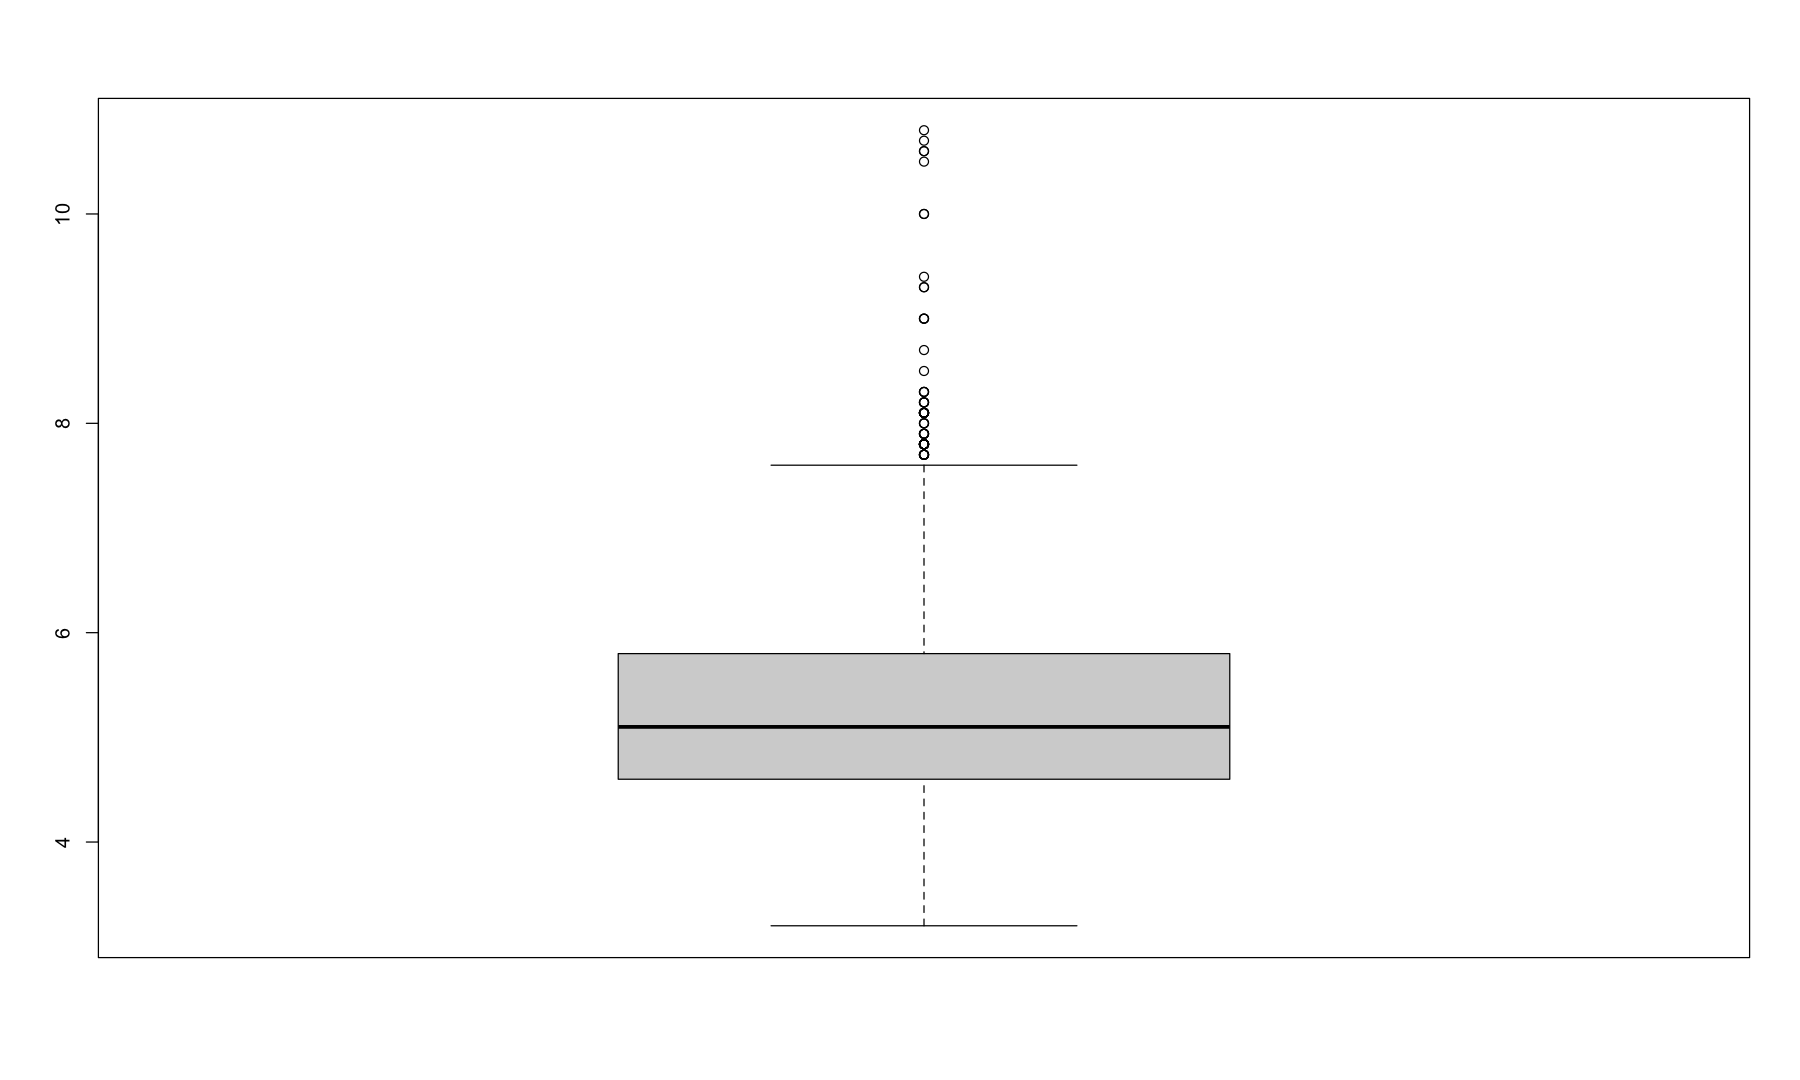

In [33]:
# 연비 이상치 특이치 확인 2차 - (이상없음)
par(bg = "white")
boxplot(final$fuel_consumption_l_100km)

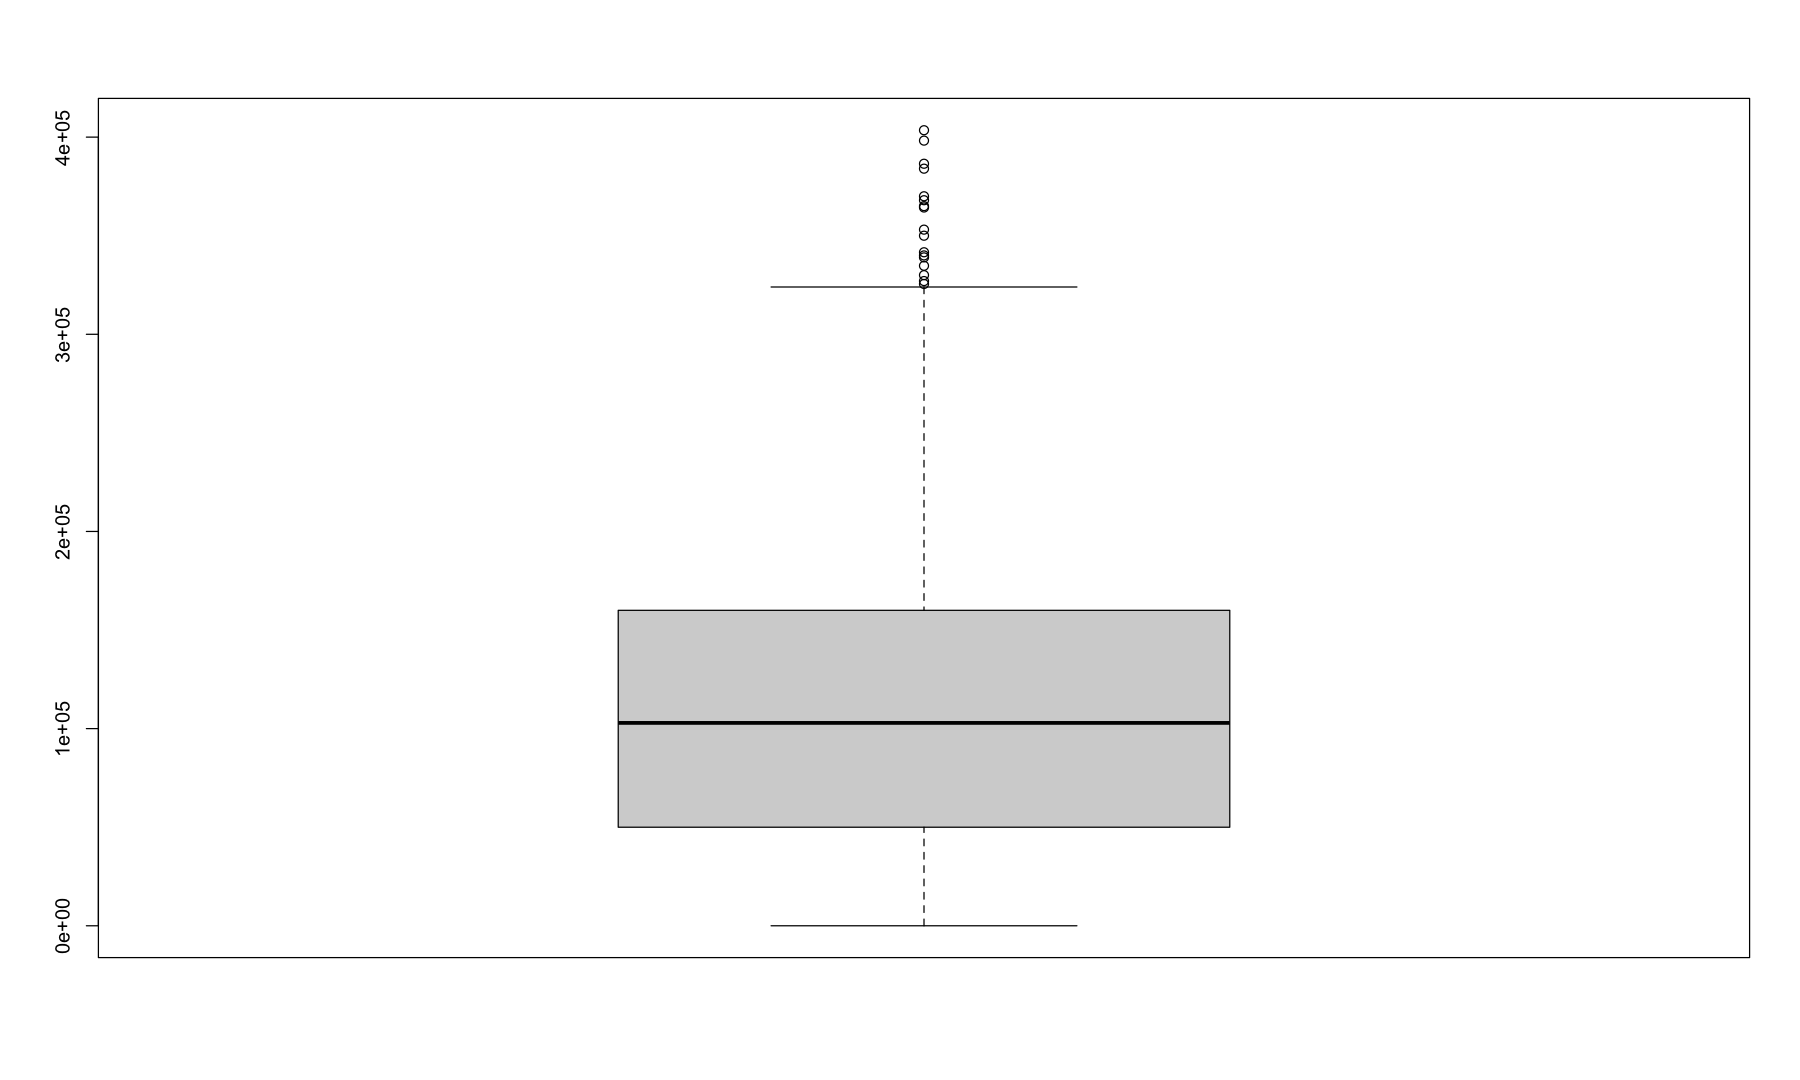

In [34]:
# 주행거리 이상치 특이치 확인 1차 - (이상없음)
par(bg = "white")
boxplot(final$mileage_in_km)

In [ ]:
# 차트
par(family = "appleGothic", bg = "white")
nc <- NbClust(final$price_in_euro, min.nc = 2, max.nc = 5, method = "kmeans")

# 꺽어진 부분이 엘보우 메소드 data의 센터 값

In [35]:
final$priceSection <- final$price_in_euro
final$priceSection <- ifelse(final$priceSection <15000, 1,final$priceSection)
final$priceSection <- ifelse(final$priceSection >=15000 & final$priceSection <30000, 2,final$priceSection)
final$priceSection <- ifelse(final$priceSection >=30000, 3,final$priceSection)
table(final$priceSection)


   1    2    3 
1426 1244  371 

In [36]:
model <- lm(price_in_euro ~ ., data = final)
model

summary(model)


Call:
lm(formula = price_in_euro ~ ., data = final)

Coefficients:
             (Intercept)                     brand                     model  
              -1.591e+06                        NA                        NA  
                    year                  power_ps         transmission_type  
               7.912e+02                 1.184e+01                -5.241e+02  
               fuel_type  fuel_consumption_l_100km             mileage_in_km  
              -1.206e+03                 9.357e+02                -1.790e-02  
             color_black              color_silver                color_grey  
              -1.270e+03                -1.368e+03                -1.098e+03  
              color_blue               color_white                 color_red  
              -8.519e+02                -1.276e+03                        NA  
            priceSection  
               7.378e+03  



Call:
lm(formula = price_in_euro ~ ., data = final)

Residuals:
   Min     1Q Median     3Q    Max 
 -8859  -2344    -97   1663  55710 

Coefficients: (3 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.591e+06  6.644e+04 -23.947  < 2e-16 ***
brand                            NA         NA      NA       NA    
model                            NA         NA      NA       NA    
year                      7.912e+02  3.289e+01  24.059  < 2e-16 ***
power_ps                  1.184e+01  3.444e+00   3.438 0.000594 ***
transmission_type        -5.241e+02  1.720e+02  -3.047 0.002332 ** 
fuel_type                -1.206e+03  2.261e+02  -5.336 1.02e-07 ***
fuel_consumption_l_100km  9.357e+02  1.260e+02   7.428 1.42e-13 ***
mileage_in_km            -1.790e-02  1.820e-03  -9.832  < 2e-16 ***
color_black              -1.270e+03  3.206e+02  -3.962 7.60e-05 ***
color_silver             -1.368e+03  3.242e+02  -4.221 2.51

----------

In [37]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거
reduced <- step(model, direction = "backward") # backward 낮은 애들을 제거하면서 와라
summary(reduced)

Start:  AIC=50649.55
price_in_euro ~ brand + model + year + power_ps + transmission_type + 
    fuel_type + fuel_consumption_l_100km + mileage_in_km + color_black + 
    color_silver + color_grey + color_blue + color_white + color_red + 
    priceSection


Step:  AIC=50649.55
price_in_euro ~ brand + model + year + power_ps + transmission_type + 
    fuel_type + fuel_consumption_l_100km + mileage_in_km + color_black + 
    color_silver + color_grey + color_blue + color_white + priceSection


Step:  AIC=50649.55
price_in_euro ~ brand + year + power_ps + transmission_type + 
    fuel_type + fuel_consumption_l_100km + mileage_in_km + color_black + 
    color_silver + color_grey + color_blue + color_white + priceSection


Step:  AIC=50649.55
price_in_euro ~ year + power_ps + transmission_type + fuel_type + 
    fuel_consumption_l_100km + mileage_in_km + color_black + 
    color_silver + color_grey + color_blue + color_white + priceSection

                           Df  Sum of Sq        RSS


Call:
lm(formula = price_in_euro ~ year + power_ps + transmission_type + 
    fuel_type + fuel_consumption_l_100km + mileage_in_km + color_black + 
    color_silver + color_grey + color_blue + color_white + priceSection, 
    data = final)

Residuals:
   Min     1Q Median     3Q    Max 
 -8859  -2344    -97   1663  55710 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.591e+06  6.644e+04 -23.947  < 2e-16 ***
year                      7.912e+02  3.289e+01  24.059  < 2e-16 ***
power_ps                  1.184e+01  3.444e+00   3.438 0.000594 ***
transmission_type        -5.241e+02  1.720e+02  -3.047 0.002332 ** 
fuel_type                -1.206e+03  2.261e+02  -5.336 1.02e-07 ***
fuel_consumption_l_100km  9.357e+02  1.260e+02   7.428 1.42e-13 ***
mileage_in_km            -1.790e-02  1.820e-03  -9.832  < 2e-16 ***
color_black              -1.270e+03  3.206e+02  -3.962 7.60e-05 ***
color_silver             -1.368e+03  3.242e+02  

In [40]:
rfFun <- function(run) {
    result <- numeric(run)  # 예측 정확도를 저장할 벡터 초기화

    for (i in 1:run) {
        # 학습용, 검증용 분류
        samp <- createDataPartition(final$price_in_euro, p = 0.7, list = FALSE)

        # 학습용, 검증용
        data.tr <- final[samp, ]
        data.test <- final[-samp, ]

        # 문제 및 정답 만들기
        x <- subset(data.test, select = -price_in_euro)
        y <- data.test$price_in_euro

        # 모델 학습
        rf <- randomForest(price_in_euro ~ ., data = data.tr, ntree = 100)

        # 예측하기
        pred <- predict(rf, x)

        # MAPE 계산
        mape <- 100 -(mean(abs((pred - y) / y)) * 100)

        # MAPE 저장
        result[i] <- mape

        # 예측 결과 출력
        cat(i, "번째 MAPE:", round(mape, 2), "%\n")

        # 정오표 / 오분류표 보기
        # print(table(pred, y))
    }

    # 평균 MAPE 출력
    cat("평균 MAPE:", round(mean(result), 2), "%\n")
}

# 함수 호출하여 5개의 반복 예측 및 평균 MAPE 출력
rfFun(5)

1 번째 MAPE: 87.44 %
2 번째 MAPE: 86.86 %
3 번째 MAPE: 87.78 %
4 번째 MAPE: 86.46 %
5 번째 MAPE: 86.48 %
평균 MAPE: 87 %


In [50]:
svmFun <- function(run) {
    result <- numeric(run)  # 예측 정확도를 저장할 벡터 초기화

    for (i in 1:run) {
        # 학습용, 검증용 분류
        samp <- createDataPartition(final$price_in_euro, p = 0.7, list = FALSE)

        # 학습용, 검증용
        data.tr <- final[samp, ]
        data.test <- final[-samp, ]

        # 문제 및 정답 만들기
        x <- subset(data.test, select = -price_in_euro)
        y <- data.test$price_in_euro

        # 모델 학습
        svm <- svm(price_in_euro ~., data = data.tr)

        # 예측하기
        pred <- predict(svm, x)

        # MAPE 계산
        mape <- 100 -(mean(abs((pred - y) / y)) * 100)

        # MAPE 저장
        result[i] <- mape

        # 예측 결과 출력
        cat(i, "번째 MAPE:", round(mape, 2), "%\n")

        # 정오표 / 오분류표 보기
        # print(table(pred, y))
    }

    # 평균 MAPE 출력
    cat("평균 MAPE:", round(mean(result), 2), "%\n")
}

# 함수 호출하여 5개의 반복 예측 및 평균 MAPE 출력
svmFun(5)

1 번째 MAPE: 15.35 %
2 번째 MAPE: 13.75 %
3 번째 MAPE: 14.35 %
4 번째 MAPE: 13.8 %
5 번째 MAPE: 13.06 %
평균 MAPE: 14.06 %


In [51]:
saveRDS(rf,"./Data/RDS_file/Audi_A3_rf.rds")

In [47]:
nnetFun <- function(run) {
    result <- numeric(run)  # 예측 정확도를 저장할 벡터 초기화

    for (i in 1:run) {
        # 학습용, 검증용 분류
        samp <- createDataPartition(final$price_in_euro, p = 0.7, list = FALSE)

        # 학습용, 검증용
        data.tr <- final[samp, ]
        data.test <- final[-samp, ]

        # 문제 및 정답 만들기
        x <- subset(data.test, select = -price_in_euro)
        y <- data.test$price_in_euro

        # 모델 학습
        model.nnet <- nnet(price_in_euro ~., data = data.tr, size = 4) # size : 은닉층 갯수

        # 예측하기
        pred <- predict(model, x)

        # MAPE 계산
        mape <- 100 -(mean(abs((pred - y) / y)) * 100)

        # MAPE 저장
        result[i] <- mape

        # 예측 결과 출력
        cat(i, "번째 MAPE:", round(mape, 2), "%\n")

        # 정오표 / 오분류표 보기
        # print(table(pred, y))
    }

    # 평균 MAPE 출력
    cat("평균 MAPE:", round(mean(result), 2), "%\n")
}

# 함수 호출하여 5개의 반복 예측 및 평균 MAPE 출력
nnetFun(5)

# weights:  69
initial  value 875051481634.461182 
final  value 875030741118.000000 
converged
1 번째 MAPE: 81.45 %
# weights:  69


initial  value 889793861166.880493 
final  value 889757278778.000000 
converged
2 번째 MAPE: 81.45 %
# weights:  69
initial  value 886801795409.200439 
final  value 886776801194.000000 
converged
3 번째 MAPE: 81.04 %
# weights:  69
initial  value 888086305857.523804 
final  value 888059069628.000000 
converged
4 번째 MAPE: 82.26 %
# weights:  69
initial  value 871569133731.357788 
final  value 871543227504.000000 
converged
5 번째 MAPE: 82.8 %
평균 MAPE: 81.8 %
